In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [4]:
X , y = make_regression(n_samples=1000 , n_features=2 , n_targets=1 , noise=3)

In [5]:
X

array([[-1.61324909,  0.85393457],
       [-1.18215729,  4.02654109],
       [-1.19339718, -0.2984979 ],
       ...,
       [ 0.2976502 ,  0.95994706],
       [-0.88259255,  0.39849841],
       [ 2.14307105, -0.03991696]])

In [6]:
y

array([ 3.31770065e+01,  3.30849592e+02, -5.87884284e+01,  2.29894995e+02,
        8.18685901e+01, -5.49845516e+01,  3.59702860e+01,  6.22301759e+01,
       -4.50068293e+01, -1.68969580e+01, -1.14436338e+01,  7.04088665e+01,
        3.64878495e+01,  3.49714842e+01,  1.58796723e+02,  1.21309801e+02,
       -1.53626867e+02, -1.18237407e+02, -1.07822577e+02, -1.55105700e+02,
        3.03353541e+01, -1.30438582e+02, -6.81888235e+01, -1.98251470e+02,
        9.94396980e+01, -6.99458782e+00,  3.33575182e+01,  1.29448625e+02,
       -1.47015143e+02,  6.03408093e+01,  2.65834642e+01,  2.29257842e+02,
        1.16648520e+02, -8.44592265e+00,  3.59709025e+01,  1.24381931e+02,
       -6.78530745e+01,  8.58961973e+01, -9.25067493e+01, -4.23144566e+01,
       -3.30155752e+01, -6.39535358e+01, -1.08546915e+02, -5.65696693e+01,
        3.64968031e+01, -1.33737090e+02,  8.31292069e+01, -4.88203652e+01,
       -7.70782036e+01, -2.48935122e+02,  5.82372113e+01, -1.48318686e+02,
        1.46793957e+02, -

<Axes: xlabel='0', ylabel='1'>

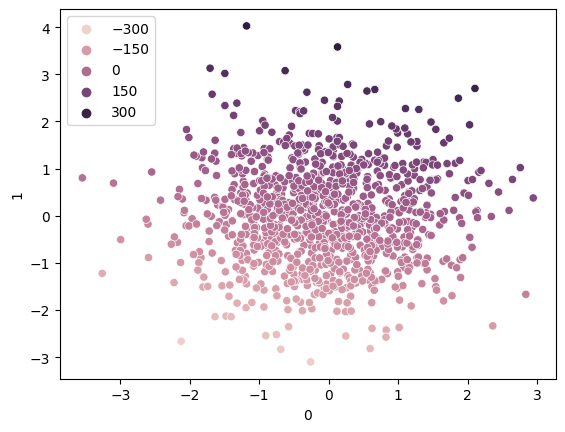

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0]  ,y=pd.DataFrame(X)[1]  , hue=y )

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [9]:
from sklearn.svm import SVR

model=SVR(kernel='linear')

In [10]:
model.fit(X_train , y_train)

SVR(kernel='linear')

In [15]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test , y_pred)

0.9988816849202041

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid={
    'C':[0.1 , 1 , 10 ,100 , 1000] ,
    'gamma' : [1  , 0.1 , 0.01 , 0.001 , 0.0001] ,
    'kernel' : ['linear'] ,
    'epsilon' : [0.1 , 0.2 , 0.3]
}

In [20]:
grid=GridSearchCV(SVR() , param_grid=param_grid  ,refit=True , cv=5 ,verbose=4)

In [21]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.727 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.744 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=4)

In [22]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [24]:
model=SVR(C=1000 , epsilon=0.3 , gamma=1 , kernel='linear')

In [25]:
model.fit(X_train ,y_train)

SVR(C=1000, epsilon=0.3, gamma=1, kernel='linear')

In [26]:
y_pred=model.predict(X_test)

In [27]:
r2_score(y_test , y_pred)

0.9989177062252135